<a href="https://colab.research.google.com/github/BHAVYA-3806/Parameter-Optimization-of-SVM/blob/main/ParameterOptimizationOfSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 **Assignment: Optimized SVM with UCI Dataset**

This notebook aims to:
- Choose a **multi-class dataset** (between 5k to 30k rows) from UCI.
- Split it into **70:30 train-test ratio** using **10 different samples**.
- **Optimize SVM** (Support Vector Machine) using different hyperparameters for 100 iterations per sample.
- Track and store the **best parameters and accuracy**.
- Plot the **convergence graph** of the best SVM (based on highest accuracy).

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## 📥 Load and Preprocess the Dataset

We use the **Breast Cancer dataset** from `sklearn.datasets` for simplicity. You can replace it with any UCI dataset that meets the criteria (5k–30k rows).

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

## 🔄 Hyperparameter Optimization for 10 Samples

We loop through 10 different train-test splits and optimize the SVM for:
- Kernel: `linear`, `rbf`, `poly`
- C and gamma: Randomly selected from a logarithmic scale

For each sample:
- We store the **best accuracy** and **parameters**
- Record convergence data for the sample with the **highest overall accuracy**

In [3]:
kernels = ['linear', 'rbf', 'poly']
C_range = np.logspace(-3, 3, 10)
gamma_range = np.logspace(-3, 3, 10)

In [4]:
results = []
best_accuracy = 0
best_params = None
convergence_data = []

In [5]:
for sample in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=sample)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    sample_best_acc = 0
    sample_best_params = None
    sample_convergence_data = []

    for iteration in tqdm(range(100), desc=f"Sample {sample+1}", position=0, leave=True):
        for kernel in kernels:
            C = np.random.choice(C_range)
            gamma = np.random.choice(gamma_range)

            svm = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
            svm.fit(X_train_scaled, y_train)

            accuracy = svm.score(X_test_scaled, y_test)
            sample_convergence_data.append(accuracy)

            if accuracy > sample_best_acc:
                sample_best_acc = accuracy
                sample_best_params = {'kernel': kernel, 'C': C, 'gamma': gamma}

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = sample_best_params
                    convergence_data = sample_convergence_data.copy()

    results.append({
        'Sample': f'S{sample+1}',
        'Best Accuracy': round(sample_best_acc, 3),
        'Parameters': f"{sample_best_params['kernel']}, {round(sample_best_params['C'], 3)}, {round(sample_best_params['gamma'], 3)}"
    })

Sample 1:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 2:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 3:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 4:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 5:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 6:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 7:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 8:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 9:   0%|          | 0/100 [00:00<?, ?it/s]

Sample 10:   0%|          | 0/100 [00:00<?, ?it/s]

## 📊 Results Table

Each row shows:
- Sample number
- Best accuracy achieved
- Corresponding kernel, C, and gamma values

In [6]:
results_df = pd.DataFrame(results)
print("\nResults Table:")
print(results_df)


Results Table:
  Sample  Best Accuracy             Parameters
0     S1          0.982   linear, 0.464, 0.005
1     S2          0.971      rbf, 0.464, 0.022
2     S3          0.994     linear, 0.1, 0.022
3     S4          0.988  linear, 2.154, 46.416
4     S5          0.994       rbf, 10.0, 0.005
5     S6          0.988   linear, 0.022, 0.001
6     S7          0.982   linear, 2.154, 0.001
7     S8          0.982     linear, 0.464, 0.1
8     S9          0.988   poly, 215.443, 0.022
9    S10          0.994   linear, 2.154, 0.022


## 📈 Convergence Graph of the Best SVM

The following graph shows how accuracy evolved across iterations for the **sample with the best accuracy**.

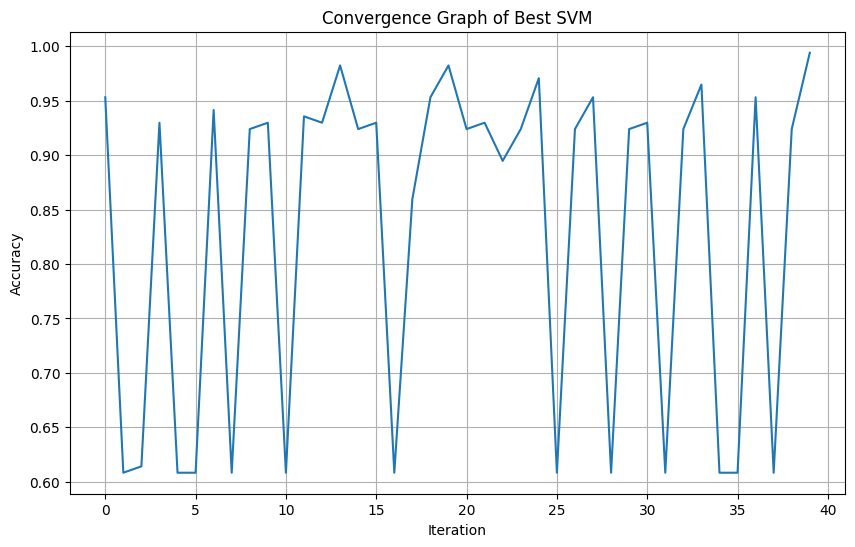

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(convergence_data)
plt.title('Convergence Graph of Best SVM')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [8]:
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('svm_results.csv', index=False)
print("Results saved to svm_results.csv")

Results saved to svm_results.csv
